<a href="https://colab.research.google.com/github/nvwa0318/Project-Eniac-2/blob/main/Project2_for_Eniac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# orderlines.csv
url = 'https://drive.google.com/file/d/1W-hJCMbft1m6t7GnoC_C6NCJO_LT7LE-/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders.csv
url = 'https://drive.google.com/file/d/1Kk0Hvvtl4Mhvw1L0KGMrbh2dO4YC0kEY/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1pscsYT4KAowVITUvACV3s2xFYyIZRJ2v/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1S6zmR_IdVlDKvdGVwwMjJUttDM_u_5pY/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

In [ ]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdate

In [ ]:
from nbpep8.nbpep8 import pep8

In [ ]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [ ]:
orderlines.info()

In [ ]:
orderlines.name

In [ ]:
orders.info()

In [ ]:
brands.info()

In [ ]:
products.info()

In [ ]:
orderlines.query('id ==1197439')

In [ ]:
orders.query('order_id==331780')

In [ ]:
products.query('sku==NEA0009')	

In [ ]:
products.describe()

In [ ]:
orders.head(5)

In [ ]:
orders_Completed=orders.loc[orders['state']=='Completed']

In [ ]:
orders_Completed

In [ ]:
orders_Completed_merged1=(
   orders_Completed.
   merge(orderlines,how='left',left_on='order_id',right_on='id_order')
    #.filter("sku","unit_price") 
)
orders_Completed_merged1

,order_id,created_date,total_paid,state,check_orders_x,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders_y
0,241423,2017-11-06 13:10:02,136.15,Completed,True,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,129.16,True
1,242832,2017-12-31 17:40:03,15.76,Completed,True,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,10.77,True
2,243330,2017-02-16 10:59:38,84.98,Completed,True,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44,77.99,True
3,245275,2017-06-28 11:35:37,149.00,Completed,True,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30,149.00,True
4,245595,2017-01-21 12:52:47,112.97,Completed,True,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00,105.98,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,527042,2018-03-14 11:47:50,18.98,Completed,True,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,13.99,True
62099,527070,2018-03-14 11:50:48,24.97,Completed,True,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,True
62100,527074,2018-03-14 11:51:42,24.97,Completed,True,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,True
62101,527096,2018-03-14 11:58:40,34.96,Completed,True,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,True


In [ ]:
orders_Completed_merged1

In [ ]:
#combine all important data
orders_Completed_merged2=(
   orders_Completed_merged1.
   merge(products,how='left',left_on='sku',right_on='sku')
   .filter(['sku','type','name','date','product_quantity','price','unit_price','total_paid'])
   #.filter('sku','type','name','price')
    #.filter("sku","unit_price") 
)
orders_Completed_merged2

,sku,type,name,date,product_quantity,price,unit_price,total_paid
0,LAC0212,11935397,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,2017-11-06 12:47:20,1,139.99,129.16,136.15
1,PAR0074,11905404,Parrot 550mAh battery for MiniDrones,2017-12-31 17:26:40,1,17.99,10.77,15.76
2,OWC0074,1364,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,2017-02-15 17:07:44,1,99.99,77.99,84.98
3,TAD0007,11905404,Tado Smart Climate Control Intelligent AC,2017-06-28 11:12:30,1,179.00,149.00,149.00
4,PAC1561,11935397,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2017-01-21 12:49:00,2,103.95,52.99,112.97
...,...,...,...,...,...,...,...,...
62098,APP0927,5384,EarPods Apple Headphones with Remote and Mic (...,2018-03-14 11:42:38,1,35.00,13.99,18.98
62099,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,2,25.00,9.99,24.97
62100,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,2,25.00,9.99,24.97
62101,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,3,25.00,9.99,34.96


In [ ]:
orders_Completed_merged3=(
   orders_Completed_merged2.
   merge(products,how='inner',left_on='sku',right_on='sku')
   .filter(['sku','type','name','date','product_quantity','price','unit_price','total_paid'])# 'Category',
   #.filter('sku','type','name','price')
    #.filter("sku","unit_price") 
)

In [ ]:
orders_Completed_merged3

In [ ]:
orders_Completed_merged3.describe()

In [ ]:
orders_Completed_merged2

In [ ]:
orders_Completed_merged2['date'] = pd.to_datetime(orders_Completed_merged2['date'])

In [ ]:
p_df = (
orders_Completed_merged2
    # create two new columns in our dataframe; year and month
    .assign(year = orders_Completed_merged2['date'].dt.strftime('%Y'), 
           month = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'product_quantity':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df

In [ ]:
# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='product_quantity', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)

In [ ]:
p_df1 = (
orders_Completed_merged2
    # create two new columns in our dataframe; year and month
    .assign(year = orders_Completed_merged2['date'].dt.strftime('%Y'), 
           month = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df1

,year,month,total_paid
0,2017,Apr,899330.97
1,2017,Aug,1269774.21
2,2017,Dec,2824520.52
3,2017,Feb,919384.27
4,2017,Jan,1838616.32
5,2017,Jul,1751133.39
6,2017,Jun,1110100.67
7,2017,Mar,229980.81
8,2017,May,1060090.01
9,2017,Nov,4827494.94


In [ ]:
p_df1_1 = (
orders_Completed_merged2
    # create two new columns in our dataframe; year and month
    .assign(year = orders_Completed_merged2['date'].dt.strftime('%Y'), 
           month = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)

Text(0, 0.5, 'Products revenue')

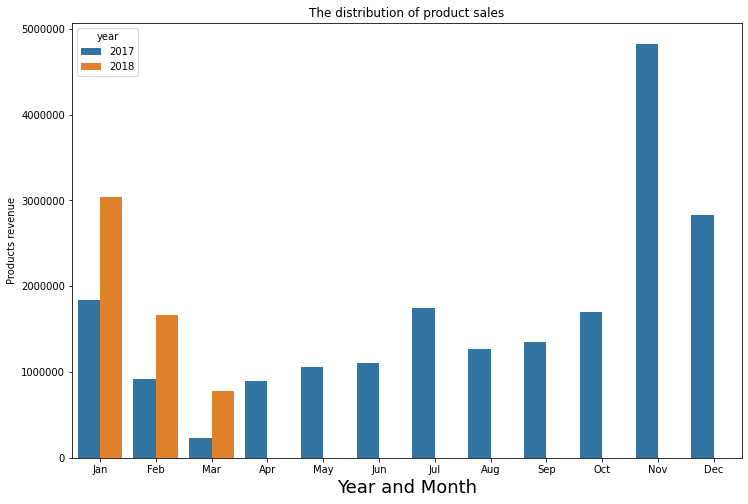

In [ ]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain', axis='y')

p = sns.barplot(
    data=p_df1, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
 order=months # order x columns
)
#p.set_xlabel('Year and Month', fontsize=18)
plt.title('The distribution of product sales')
plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Products revenue')

In [ ]:
orders_Completed_merged2["quarter"] = orders_Completed_merged2["date"].dt.to_period("Q")
year_month=orders_Completed_merged2['date'].dt.strftime('%Y%m')
orders_Completed_merged2

,sku,type,name,date,product_quantity,price,unit_price,total_paid,quarter
0,LAC0212,11935397,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,2017-11-06 12:47:20,1,139.99,129.16,136.15,2017Q4
1,PAR0074,11905404,Parrot 550mAh battery for MiniDrones,2017-12-31 17:26:40,1,17.99,10.77,15.76,2017Q4
2,OWC0074,1364,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,2017-02-15 17:07:44,1,99.99,77.99,84.98,2017Q1
3,TAD0007,11905404,Tado Smart Climate Control Intelligent AC,2017-06-28 11:12:30,1,179.00,149.00,149.00,2017Q2
4,PAC1561,11935397,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2017-01-21 12:49:00,2,103.95,52.99,112.97,2017Q1
...,...,...,...,...,...,...,...,...,...
62098,APP0927,5384,EarPods Apple Headphones with Remote and Mic (...,2018-03-14 11:42:38,1,35.00,13.99,18.98,2018Q1
62099,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,2,25.00,9.99,24.97,2018Q1
62100,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,2,25.00,9.99,24.97,2018Q1
62101,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,3,25.00,9.99,34.96,2018Q1


In [ ]:
orders_Completed_merged2['date1']=orders_Completed_merged2['date'].dt.strftime('%Y-%m')
orders_Completed_merged2['year'] = orders_Completed_merged2['date'].dt.strftime('%Y')

In [ ]:
orders_Completed_merged2.type.fillna('', inplace=True)
orders_Completed_merged2['Category'] = 'Accessory'
orders_Completed_merged2['Category'].loc[orders_Completed_merged2.type.isin(["1,02E+12", "2,17E+11" , "5,39E+11", "5,44E+11" , "21622158", "21632158", "5,45E+15", "9,29E+11", "2158", "1282", "51912158", "5,74E+15", "1282", "51882158", "5,43E+15", "5,72E+15", "2,16E+11", "118692158"])] = 'iMac/MacBook'
orders_Completed_merged2['Category'].loc[orders_Completed_merged2.type.isin(["12141714", "42931714", "13621714", "24861714", "51861714", "1714", "51871714", "12051714", "12031714", "106431714", "113851714","24821716", "51601716", "85641716", "24811716", "85651716", "1716", "21571716", "21561716", "113291716", "113281716", "113271716"])] = 'iPad/Phones'
orders_Completed_merged2['Category'].loc[orders_Completed_merged2.name.str.contains("Tablet") | (orders_Completed_merged2.name.str.contains("Phone") & (orders_Completed_merged2.price>400) )] = 'iPad/Phones'
orders_Completed_merged2['Category'].loc[(orders_Completed_merged2.name.str.contains("Watch") & (orders_Completed_merged2.price>200)) | orders_Completed_merged2.type == "11905404"] = 'Watch'
orders_Completed_merged2['Category'].loc[orders_Completed_merged2.name.str.contains('service') | orders_Completed_merged2.name.str.contains('Service') | orders_Completed_merged2.name.str.contains('repair')|orders_Completed_merged2.name.str.contains('Repair') | orders_Completed_merged2.name.str.contains('warranty') | orders_Completed_merged2.type.isin(["1,46E+11"])] = 'Service'
orders_Completed_merged2['Category'].loc[orders_Completed_merged2.type.isin(["1416", "4259"])] = 'Software'
orders_Completed_merged2['Category'].loc[orders_Completed_merged2.type.isin(['11935397', '12655397', '12215397', '12995397', '1276', '1433', '1298', '1404'] )] = 'HardDrive'
orders_Completed_merged2['Category'].loc[(orders_Completed_merged2.name.str.contains("Mini Server", case= False) & (orders_Completed_merged2.price>200)) | (orders_Completed_merged2.name.str.contains("Server", case= False) & (orders_Completed_merged2.price>400)) | orders_Completed_merged2.type.isin([['12175397', '1334', '11935397', '1280', '1298', '12655397']])] = 'Servers'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
orders_Completed_merged2

,sku,type,name,date,product_quantity,price,unit_price,total_paid,quarter,Category,date1,year
0,LAC0212,11935397,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,2017-11-06 12:47:20,1,139.99,129.16,136.15,2017Q4,HardDrive,2017-11,2017
1,PAR0074,11905404,Parrot 550mAh battery for MiniDrones,2017-12-31 17:26:40,1,17.99,10.77,15.76,2017Q4,Accessory,2017-12,2017
2,OWC0074,1364,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,2017-02-15 17:07:44,1,99.99,77.99,84.98,2017Q1,Accessory,2017-02,2017
3,TAD0007,11905404,Tado Smart Climate Control Intelligent AC,2017-06-28 11:12:30,1,179.00,149.00,149.00,2017Q2,Accessory,2017-06,2017
4,PAC1561,11935397,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2017-01-21 12:49:00,2,103.95,52.99,112.97,2017Q1,HardDrive,2017-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
62098,APP0927,5384,EarPods Apple Headphones with Remote and Mic (...,2018-03-14 11:42:38,1,35.00,13.99,18.98,2018Q1,Accessory,2018-03,2018
62099,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,2,25.00,9.99,24.97,2018Q1,Accessory,2018-03,2018
62100,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,2,25.00,9.99,24.97,2018Q1,Accessory,2018-03,2018
62101,APP0698,1230,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,3,25.00,9.99,34.96,2018Q1,Accessory,2018-03,2018


In [ ]:
p_df2 = (
orders_Completed_merged2
    # create two new columns in our dataframe; year and month
    .assign(year = orders_Completed_merged2['date'].dt.strftime('%Y')) 
    #       quarter = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','quarter'])
    .agg({'product_quantity':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df2

,year,quarter,product_quantity
0,2017,2017Q1,11343
1,2017,2017Q2,8040
2,2017,2017Q3,12016
3,2017,2017Q4,23494
4,2018,2018Q1,14738


In [ ]:
p_df2_1 = (
orders_Completed_merged2
    # create two new columns in our dataframe; year and month
    .assign(year = orders_Completed_merged2['date'].dt.strftime('%Y')) 
    #       quarter = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','quarter'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df2_1

,year,quarter,total_paid
0,2017,2017Q1,2987981.40
1,2017,2017Q2,3069521.65
2,2017,2017Q3,4367175.06
3,2017,2017Q4,9348926.67
4,2018,2018Q1,5479523.13


In [ ]:
orderlines_disc_percent['date1']=orderlines_disc_percent['date'].dt.strftime('%Y-%m')
orderlines_disc_percent['year'] = orderlines_disc_percent['date'].dt.strftime('%Y')

In [ ]:
orderlines_disc_percent.type.fillna('', inplace=True)
orderlines_disc_percent['Category'] = 'Accessory'
orderlines_disc_percent['Category'].loc[orderlines_disc_percent.type.isin(["1,02E+12", "2,17E+11" , "5,39E+11", "5,44E+11" , "21622158", "21632158", "5,45E+15", "9,29E+11", "2158", "1282", "51912158", "5,74E+15", "1282", "51882158", "5,43E+15", "5,72E+15", "2,16E+11", "118692158"])] = 'iMac/MacBook'
orderlines_disc_percent['Category'].loc[orderlines_disc_percent.type.isin(["12141714", "42931714", "13621714", "24861714", "51861714", "1714", "51871714", "12051714", "12031714", "106431714", "113851714","24821716", "51601716", "85641716", "24811716", "85651716", "1716", "21571716", "21561716", "113291716", "113281716", "113271716"])] = 'iPad/Phones'
orderlines_disc_percent['Category'].loc[orderlines_disc_percent.name.str.contains("Tablet") | (orderlines_disc_percent.name.str.contains("Phone") & (orderlines_disc_percent.price>400) )] = 'iPad/Phones'
orderlines_disc_percent['Category'].loc[(orderlines_disc_percent.name.str.contains("Watch") & (orderlines_disc_percent.price>200)) | orderlines_disc_percent.type == "11905404"] = 'Watch'
orderlines_disc_percent['Category'].loc[orderlines_disc_percent.name.str.contains('service') | orderlines_disc_percent.name.str.contains('Service') | orderlines_disc_percent.name.str.contains('repair')|orderlines_disc_percent.name.str.contains('Repair') | orderlines_disc_percent.name.str.contains('warranty') | orderlines_disc_percent.type.isin(["1,46E+11"])] = 'Service'
orderlines_disc_percent['Category'].loc[orderlines_disc_percent.type.isin(["1416", "4259"])] = 'Software'
orderlines_disc_percent['Category'].loc[orderlines_disc_percent.type.isin(['11935397', '12655397', '12215397', '12995397', '1276', '1433', '1298', '1404'] )] = 'HardDrive'
orderlines_disc_percent['Category'].loc[(orderlines_disc_percent.name.str.contains("Mini Server", case= False) & (orderlines_disc_percent.price>200)) | (orderlines_disc_percent.name.str.contains("Server", case= False) & (orderlines_disc_percent.price>400)) | orderlines_disc_percent.type.isin([['12175397', '1334', '11935397', '1280', '1298', '12655397']])] = 'Servers'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
orderlines_disc=(
orders_Completed_merged2
    .assign(disc = lambda x: x["unit_price"] - x["price"])
    .query("disc > 0")
    .dropna()
    #.sum()
    # .query("0 < diff < 30")
    #["diff"].hist(bins=50)
    # .sample(10)
)

In [ ]:
orders_Completed_merged2disc

In [ ]:
orderlines_disc_percent=(
orderlines_disc
    .assign(percent = lambda x: (1-x["price"]/x["unit_price"])*100)
    #.sum()
    # .query("0 < diff < 30")
    #["diff"].hist(bins=50)
    # .sample(10)
)
orderlines_disc_percent

,sku,type,name,date,product_quantity,price,unit_price,total_paid,quarter,disc,percent
83,PUR0150,11865403,"Pure Nude Ultraslim 03 ""7/8 Transparent iPhone...",2017-01-10 22:48:08,1,12.95,12.99,17.98,2017Q1,0.04,0.307929
112,IHE0026,11905404,iHealth box 50 Reagent Strips glucímetros,2017-04-21 19:19:07,1,19.95,19.99,24.98,2017Q2,0.04,0.200100
124,LAC0182,11935397,LaCie Porsche Design Mobile Hard Drive 4TB USB...,2017-01-09 16:40:28,1,199.99,235.99,342.97,2017Q1,36.00,15.254884
132,PHI0056,11905404,Philips Hue Go Portable Light White,2017-01-02 22:39:55,1,79.95,79.99,79.99,2017Q1,0.04,0.050006
137,KIN0153-2,1364,Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3å...,2017-01-16 18:45:58,1,149.98,174.99,351.97,2017Q1,25.01,14.292245
...,...,...,...,...,...,...,...,...,...,...,...
61369,IFX0032,12755395,iFixit 127mm Optical Bay SATA Adapter iMac / M...,2018-03-08 11:16:08,1,39.95,39.99,46.98,2018Q1,0.04,0.100025
61375,CRU0021,1364,Crucial Mac Memory 8GB 1600MHZ DDR3 SO-DIMM,2018-03-08 11:32:53,1,79.99,81.99,88.98,2018Q1,2.00,2.439322
61463,NOM0021,11865403,Nomad 8/7 Leather Case iPhone Case Brown,2018-03-09 09:21:25,1,39.95,39.99,46.98,2018Q1,0.04,0.100025
61531,PAC2428,12175397,Synology DS918 + NAS Server | 8GB RAM,2018-03-09 12:50:14,1,636.98,636.99,643.98,2018Q1,0.01,0.001570


In [ ]:
p_df3 = (
orderlines_disc_percent                #orders_Completed_merged3
    # create two new columns in our dataframe; year and month
    .assign(year = orderlines_disc_percent['date'].dt.strftime('%Y')) 
    #       quarter = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['date1','year'])
    #.hue='year'
    .agg({'disc':'sum'},{'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df3

,date1,year,disc
0,2017-01,2017,7881.89
1,2017-02,2017,4029.64
2,2017-03,2017,364.60
3,2017-04,2017,1457.65
4,2017-05,2017,3795.86
5,2017-06,2017,5805.35
6,2017-07,2017,4727.61
7,2017-08,2017,2266.77
8,2017-09,2017,760.16
9,2017-10,2017,641.81


In [ ]:
p_df3_1 = (
orders_Completed_merged2                #orders_Completed_merged3
    # create two new columns in our dataframe; year and month
    .assign(year = orders_Completed_merged2['date'].dt.strftime('%Y')) 
    #       quarter = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['date1','year'])
    #.hue='year'
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df3_1

,date1,year,total_paid
0,2017-01,2017,1838616.32
1,2017-02,2017,919384.27
2,2017-03,2017,229980.81
3,2017-04,2017,899330.97
4,2017-05,2017,1060090.01
5,2017-06,2017,1110100.67
6,2017-07,2017,1751133.39
7,2017-08,2017,1269774.21
8,2017-09,2017,1346267.46
9,2017-10,2017,1696911.21


In [ ]:
orderlines_disc_percent

,sku,type,name,date,product_quantity,price,unit_price,total_paid,quarter,disc,percent,date1,year,Category
83,PUR0150,11865403,"Pure Nude Ultraslim 03 ""7/8 Transparent iPhone...",2017-01-10 22:48:08,1,12.95,12.99,17.98,2017Q1,0.04,0.307929,2017-01,2017,Accessory
112,IHE0026,11905404,iHealth box 50 Reagent Strips glucímetros,2017-04-21 19:19:07,1,19.95,19.99,24.98,2017Q2,0.04,0.200100,2017-04,2017,Accessory
124,LAC0182,11935397,LaCie Porsche Design Mobile Hard Drive 4TB USB...,2017-01-09 16:40:28,1,199.99,235.99,342.97,2017Q1,36.00,15.254884,2017-01,2017,HardDrive
132,PHI0056,11905404,Philips Hue Go Portable Light White,2017-01-02 22:39:55,1,79.95,79.99,79.99,2017Q1,0.04,0.050006,2017-01,2017,Accessory
137,KIN0153-2,1364,Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3å...,2017-01-16 18:45:58,1,149.98,174.99,351.97,2017Q1,25.01,14.292245,2017-01,2017,Accessory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61369,IFX0032,12755395,iFixit 127mm Optical Bay SATA Adapter iMac / M...,2018-03-08 11:16:08,1,39.95,39.99,46.98,2018Q1,0.04,0.100025,2018-03,2018,Accessory
61375,CRU0021,1364,Crucial Mac Memory 8GB 1600MHZ DDR3 SO-DIMM,2018-03-08 11:32:53,1,79.99,81.99,88.98,2018Q1,2.00,2.439322,2018-03,2018,Accessory
61463,NOM0021,11865403,Nomad 8/7 Leather Case iPhone Case Brown,2018-03-09 09:21:25,1,39.95,39.99,46.98,2018Q1,0.04,0.100025,2018-03,2018,Accessory
61531,PAC2428,12175397,Synology DS918 + NAS Server | 8GB RAM,2018-03-09 12:50:14,1,636.98,636.99,643.98,2018Q1,0.01,0.001570,2018-03,2018,Servers


In [ ]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

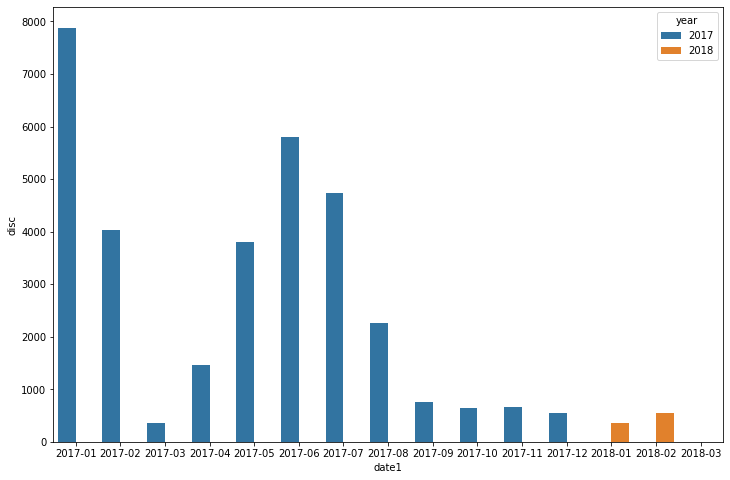

In [ ]:
plt.subplots(figsize=(12, 8))
p = sns.barplot(
    data=p_df3, # dataframe we will use to look for the columns information
    x='date1', # x values on our chart
    y='disc', # y values on our chart
    hue='year', # group color in our chart
    #order='quarter' # order x columns
)

In [ ]:
p_df4 = (
orders_Completed_merged2                #orders_Completed_merged3
    # create two new columns in our dataframe; year and month
    #.assign(year = orderlines_disc_percent['date'].dt.strftime('%Y')) 
    #       quarter = orders_Completed_merged2['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['date1','year'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df4

,date1,year,total_paid
0,2017-01,2017,1838616.32
1,2017-02,2017,919384.27
2,2017-03,2017,229980.81
3,2017-04,2017,899330.97
4,2017-05,2017,1060090.01
5,2017-06,2017,1110100.67
6,2017-07,2017,1751133.39
7,2017-08,2017,1269774.21
8,2017-09,2017,1346267.46
9,2017-10,2017,1696911.21


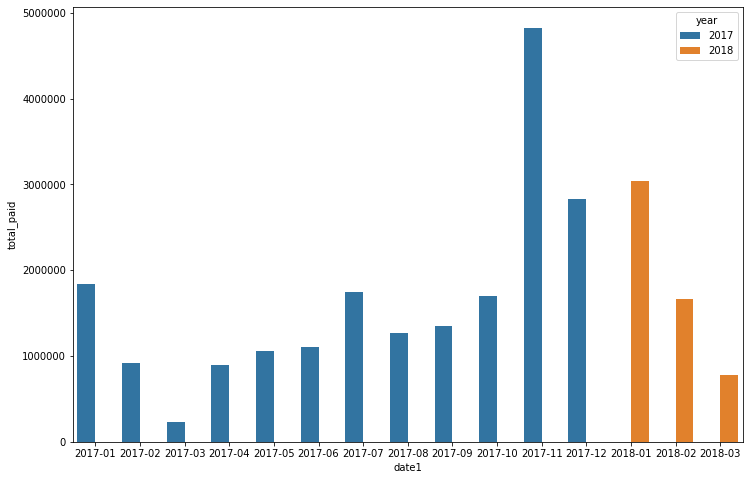

In [ ]:
plt.subplots(figsize=(12, 8))
p = sns.barplot(
    data=p_df4, # dataframe we will use to look for the columns information
    x='date1', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    #order='quarter' # order x columns
)
plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'Products quantity')

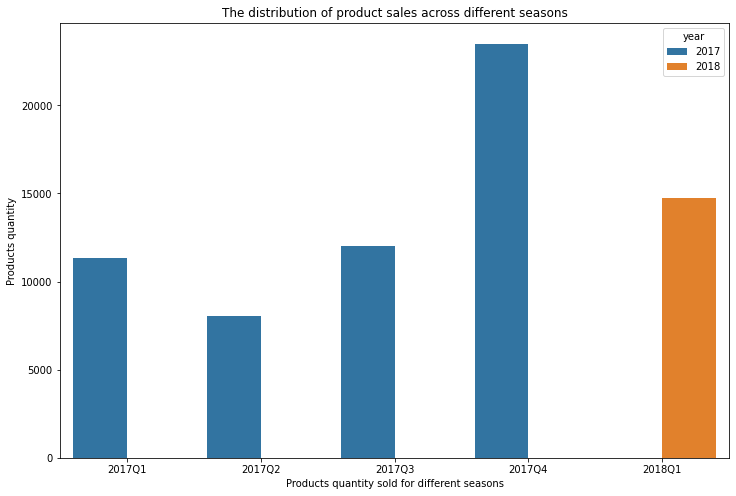

In [ ]:
plt.subplots(figsize=(12, 8))
p = sns.barplot(
    data=p_df2, # dataframe we will use to look for the columns information
    x='quarter', # x values on our chart
    y='product_quantity', # y values on our chart
    hue='year', # group color in our chart
    #order='quarter' # order x columns
)
plt.title('The distribution of product sales across different seasons')
plt.xlabel('Products quantity sold for different seasons')
plt.ylabel('Products quantity')

Text(0, 0.5, 'Revenue')

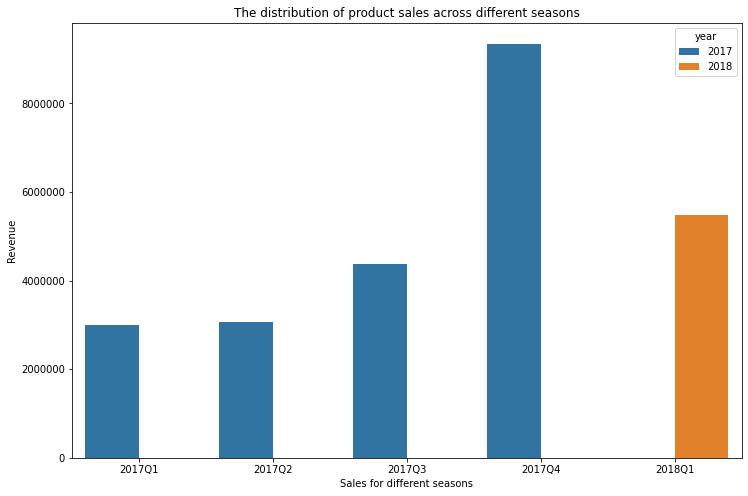

In [ ]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain', axis='y')
p = sns.barplot(
    data=p_df2_1, # dataframe we will use to look for the columns information
    x='quarter', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    #order='quarter' # order x columns
)
plt.title('The distribution of products sales across different seasons')
plt.xlabel('Sales for different seasons')
plt.ylabel('Revenue')

In [ ]:
(
orderlines
    .merge(products, how="left", left_on = "sku", right_on = "sku")
    .filter(["sku","unit_price","price"])
    .assign(diff = lambda x: x["unit_price"] - x["price"])
    .query("diff > 0")
    .sum()
    # .query("0 < diff < 30")
    #["diff"].hist(bins=50)
    # .sample(10)
)   #check how much discounts are made.

sku           APP1647APP1648APP1651APP1651LGE0053APP1646TRK0...
unit_price                                           3856263.56
price                                                3314819.04
diff                                                  541444.52
dtype: object

In [ ]:
orderlines_disc

In [ ]:
orderlines_disc.disc.sum()

In [ ]:
orderlines_disc_percent.describe()

In [ ]:
orderlines_disc_percent.info()

In [ ]:
orderlines_disc_percent


,sku,type,name,date,product_quantity,price,unit_price,total_paid,quarter,disc,percent,date1,year,Category
83,PUR0150,11865403,"Pure Nude Ultraslim 03 ""7/8 Transparent iPhone...",2017-01-10 22:48:08,1,12.95,12.99,17.98,2017Q1,0.04,0.307929,2017-01,2017,Accessory
112,IHE0026,11905404,iHealth box 50 Reagent Strips glucímetros,2017-04-21 19:19:07,1,19.95,19.99,24.98,2017Q2,0.04,0.200100,2017-04,2017,Accessory
124,LAC0182,11935397,LaCie Porsche Design Mobile Hard Drive 4TB USB...,2017-01-09 16:40:28,1,199.99,235.99,342.97,2017Q1,36.00,15.254884,2017-01,2017,HardDrive
132,PHI0056,11905404,Philips Hue Go Portable Light White,2017-01-02 22:39:55,1,79.95,79.99,79.99,2017Q1,0.04,0.050006,2017-01,2017,Accessory
137,KIN0153-2,1364,Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3å...,2017-01-16 18:45:58,1,149.98,174.99,351.97,2017Q1,25.01,14.292245,2017-01,2017,Accessory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61369,IFX0032,12755395,iFixit 127mm Optical Bay SATA Adapter iMac / M...,2018-03-08 11:16:08,1,39.95,39.99,46.98,2018Q1,0.04,0.100025,2018-03,2018,Accessory
61375,CRU0021,1364,Crucial Mac Memory 8GB 1600MHZ DDR3 SO-DIMM,2018-03-08 11:32:53,1,79.99,81.99,88.98,2018Q1,2.00,2.439322,2018-03,2018,Accessory
61463,NOM0021,11865403,Nomad 8/7 Leather Case iPhone Case Brown,2018-03-09 09:21:25,1,39.95,39.99,46.98,2018Q1,0.04,0.100025,2018-03,2018,Accessory
61531,PAC2428,12175397,Synology DS918 + NAS Server | 8GB RAM,2018-03-09 12:50:14,1,636.98,636.99,643.98,2018Q1,0.01,0.001570,2018-03,2018,Servers


In [ ]:
orderlines.head()

In [ ]:
orderlines.head()

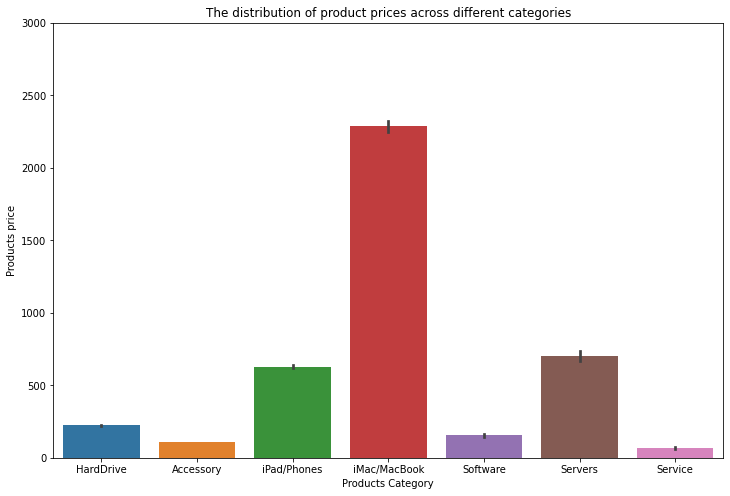

In [ ]:
plt.subplots(figsize=(12, 8))

sns.barplot(data=orders_Completed_merged2, x='Category', y='price')

plt.ylim(0,3000)
plt.title('The distribution of product prices across different categories')
plt.xlabel('Products Category')
plt.ylabel('Products price')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")
plt.show()

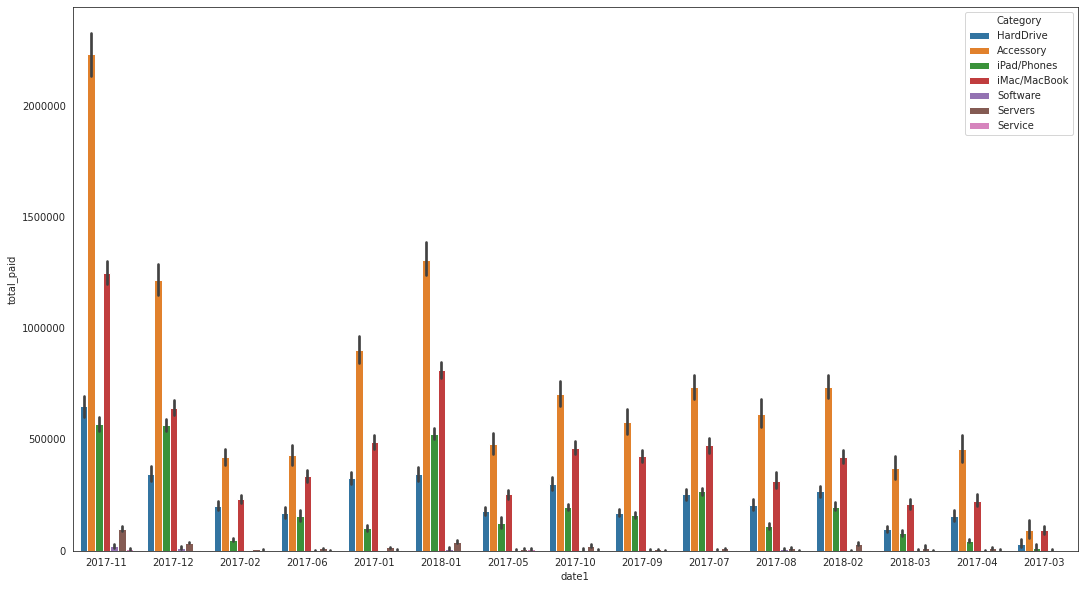

In [ ]:
plt.subplots(figsize=(18, 10))

sns.barplot(data=orders_Completed_merged2, x='date1',y='total_paid', hue="Category",estimator = sum
             #alpha=.3, # add transparency to you chart
             #kde=True, # add a density line in the histogram
             #bins=15 # define the number of bins the variable total paid will be grouped
            )
plt.ticklabel_format(style='plain', axis='y')

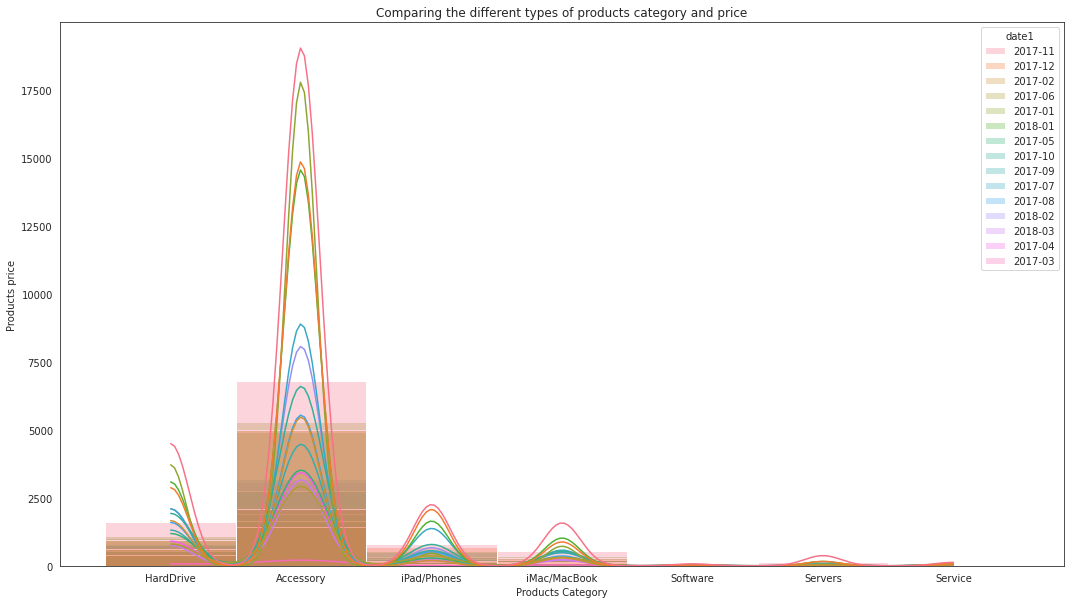

In [ ]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=orders_Completed_merged2, x='Category', hue="date1",
             alpha=.3, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=15 # define the number of bins the variable total paid will be grouped
            )


plt.title('Comparing the different types of products category and price')
plt.xlabel('Products Category')
plt.ylabel('Products price')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

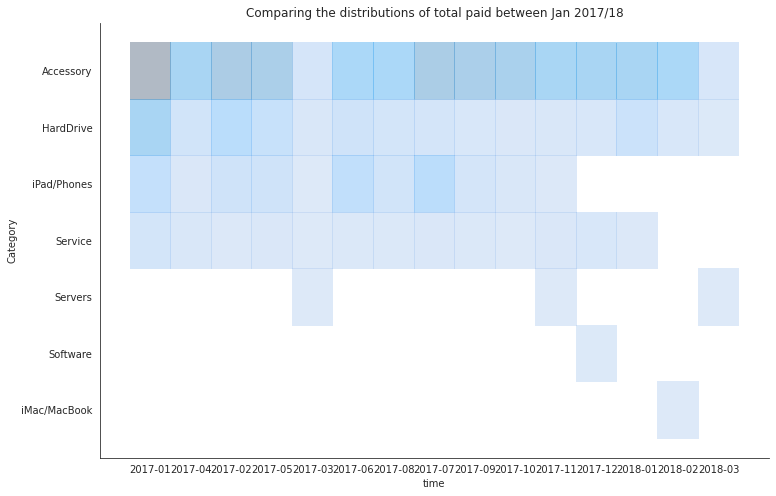

In [ ]:
plt.subplots(figsize=(12, 8))

sns.histplot(data=orderlines_disc_percent, y='Category', x='date1',
             alpha=.4, # add transparency to you chart
             kde=True, # add a density line in the histogram
             #bins=200 # defihe the number of bins the variable total paid will be grouped
            )
sns.set_style("white")

plt.title('Comparing the distributions of total paid between Jan 2017/18')
plt.xlabel('time')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

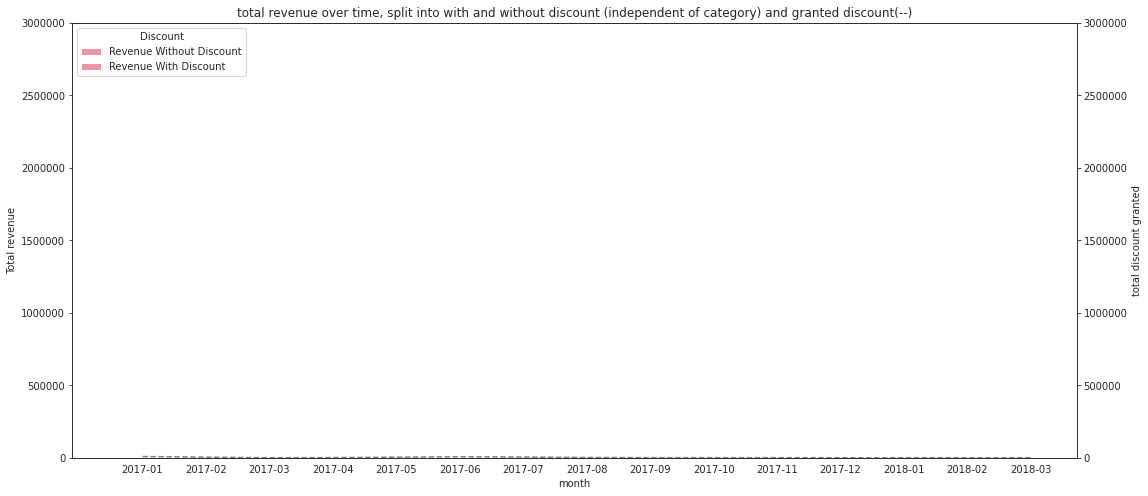

In [ ]:
orderlines_disc_percent['total_discount'] = orderlines_disc_percent['disc'] * orderlines_disc_percent['product_quantity']
fig, p1 = plt.subplots(figsize=(18, 8),sharex=True, sharey=True)

p1 = sns.barplot(
    data=orderlines_disc_percent, # dataframe we will use to look for the columns information
    x='date1', # x values on our chart
    y='total_paid', # y values on our chart
    hue='disc',
    estimator = sum , # adding up, not showing the mean
    ax=p1 ,
    ci=None
)

plt.legend(title='Discount', labels=['Revenue Without Discount', 'Revenue With Discount'])
p1.set_ylim(0,3000000)
p1.set_xlabel('month') # x label name
p1.set_ylabel('Total revenue')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# add line for the total discount granted

p2 = p1.twinx()

p2.plot(orderlines_disc_percent.groupby(['date1']).agg({'disc' : 'sum'}).reset_index()['date1'],
    orderlines_disc_percent.groupby(['date1']).agg({'total_discount' : 'sum'}).reset_index()['total_discount'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray',
)

p2.set_ylim(0,3000000)
p2.set_ylabel('total discount granted')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

plt.title('total revenue over time, split into with and without discount (independent of category) and granted discount(--)') # title
plt.show() # show the plot
#orderlines['discount'] = orderlines.price - orderlines.unit_price
#orderlines['total_discount'] = orderlines['discount'] * orderlines['product_quantity']
#orderlines['sold'] = orderlines.state.apply(lambda x : 1 if x == 'Completed' else 0)

In [ ]:
dataframe = (
  order_placed
    .assign(month = orderlines['date'].dt.strftime('%b'),
            day = orderlines['date'].dt.strftime('%a'))
    # get the total paid by each year and month
    .groupby(['month','day'])
    .agg({'total_discount':'sum'})
    #.sort_values('total_discount', ascending=True)
    .reset_index()
    # reset the index to user the column vector in our plot

)
dataframe
order_placed = orderlines.query('state=="Completed"')
order_placed
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=dataframe, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_discount', # y values on our chart
    hue='day', # group color in our chart
    #order=months, # order x columns
    palette=("magma")
)

plt.title('The distribution of sale after discount')
plt.xlabel('Months')
plt.ylabel('Products Quantity with discount')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")
plt.show()

NameError: ignored

In [ ]:
test_list = products.query('name.str.contains("iMac")', engine='python')['name'].to_numpy()
test_list